# **Project Title: Make Job Hunting Easier: LinkedIn Job Recommendation Based on Applicants' Description**

team member: Shaoying Zheng, Zhongrui Ning, Xiao Pu


# **Overview**

Our project hopes to match the most suitable job in the LinkedIn system with the information provided by the applicant, including their education, skills, ideal industry, ideal salary, etc. Ideally, the model we build will be adaptive, it can adjust and provide suitable job matches even with incomplete details.

# **Motivation**

Job hunting process for college students is daunting, especially in today's rapidly evolving labor market, where new-graduate job seekers are faced with an overwhelming number of job postings. When going through job application websites or apps like LinkedIn, many applicants spend a considerable amount of time filtering through irrelevant or unsuitable jobs, leading to inefficiency and frustration. Therefore, developing a smart, data-driven recommendation system that can make job hunting more personalized, efficient, and tailored to each individual's profile would provide immense value to job seekers.

Here are several specific questions we aim to explore:
1. What are the most common skills listed in job postings across various industries?

    What we hope to learn: By identifying the most frequently mentioned skills, we hope to find some "universal" skills in this era.

2. How do job requirements vary across different industries?

    What we hope to learn: We hope to identify the unique skills and qualifications required in different industries, which can help job seekers better understand the job market and make informed decisions.

3. How could job hunters with different background find suitable jobs?
  
    What we hope to learn: We hope to build a model that can provide job recommendations based on the applicant's background information, such as education, skills, and industry preference. Also, we hope to explore how the model can adapt to incomplete information.





# **Data Sources**

Source: [LinkedIn Job Postings (2023 - 2024)](ttps://www.kaggle.com/datasets/arshkon/linkedin-job-postingslo)
- A Snapshot Into the Current Job Market including company, jobs and mapping datasets.
This data source contains a nearly comprehensive record of 124,000+ job postings listed in 2023 and 2024. Each individual posting contains dozens of valuable attributes for both postings and companies, including the title, job description, salary, location, application URL, and work-types (remote, contract, etc), in addition to separate files containing the benefits, skills, and industries associated with each posting.


We're using 8 tables from original data source for this project:

1. `companies.csv`: Describing the situation of the companies
2. `company_industries.csv`: Industries that companies focusing on
3. `employee_counts.csv`: Amount of employee and follower on LinkedIn of those companies
4. `industries.csv`: Industries identifier ID and descriptions
5. `skills.csv`: Full name and abbreviation of job skills
6. `job_skills.csv`: What skills the posting jobs need
7. `job_industries.csv`: What industries the posting jobs based on
8. `salaries.csv`: The salary condition for the posted jobs
9. `job_company_id.csv`: To connect the posted job and certain company. 


# **Data description**

Here is how the data is structured and the columns attributes we used for merging. 

![SI_618_proj_ERD.png](SI_618_proj_ERD.png)

# **Data Manipulation**

## Steps:
**1. Merge dataframes:**

**2. Handle missing values:**

**3.Standardize Format:**

**4.create new columns**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mticker

In [31]:
# import the csv files and save as pd dataframes
companies = pd.read_csv('./Projectdata/company/companies.csv',usecols=['company_id','name','company_size','country'])
company_industries = pd.read_csv('./Projectdata/company/company_industries.csv', usecols=['company_id','industry'])
employee_counts = pd.read_csv('./Projectdata/company/employee_counts.csv', usecols=['company_id','employee_count', 'follower_count'])
skills = pd.read_csv('./Projectdata/mappings/skills.csv', usecols=['skill_abr','skill_name'] )
industries = pd.read_csv('./Projectdata/mappings/industries.csv', usecols=['industry_id','industry_name'])
job_skills = pd.read_csv('./Projectdata/jobs/job_skills.csv', usecols=['job_id','skill_abr'])
job_industries = pd.read_csv('./Projectdata/jobs/job_industries.csv', usecols=['job_id','industry_id'])
salaries = pd.read_csv('./Projectdata/jobs/salaries.csv', usecols=['job_id','max_salary','min_salary','med_salary','pay_period'])
job_company_pair = pd.read_csv('./job_company_id.csv', usecols=['job_id','company_id'])

In [32]:
# Because original posting data is too large, we will only use a subset of the data

# job_company_id = pd.read_csv('./Projectdata/postings.csv', usecols=['job_id','company_id'])
# job_company_id.to_csv('./Projectdata/job_company_id.csv', index=False)

In [33]:
# Make sure IDs are not null in all tables, and make sure keys (first column in each table) are unique
for table in [companies, company_industries, employee_counts, skills, industries, job_skills, job_industries, salaries]:
    id_fields = [col for col in table.columns if col.endswith('_id')]
    for field in id_fields:
        if field in table.columns:
            assert table[field].isnull().sum() == 0

In [34]:
# First, merge all dataframes related to jobs
job_skills = job_skills.merge(skills, on='skill_abr')

In [35]:
# Merge job_skills with job relating dataframes
job_condition = job_skills.merge(job_industries, on='job_id')
job_condition


,job_id,skill_abr,skill_name,industry_id
0,3884428798,MRKT,Marketing,82
1,3884428798,PR,Public Relations,82
2,3884428798,WRT,Writing/Editing,82
3,3887473071,SALE,Sales,48
4,3887465684,FIN,Finance,41
...,...,...,...,...
286880,3902876855,HR,Human Resources,80
286881,3902878689,MGMT,Management,116
286882,3902878689,MNFC,Manufacturing,116
286883,3902883233,SALE,Sales,44


In [36]:
job_condition = job_condition.merge(salaries, on='job_id')
job_condition

,job_id,skill_abr,skill_name,industry_id,max_salary,med_salary,min_salary,pay_period
0,3884428798,MRKT,Marketing,82,NaN,20.0,NaN,HOURLY
1,3884428798,PR,Public Relations,82,NaN,20.0,NaN,HOURLY
2,3884428798,WRT,Writing/Editing,82,NaN,20.0,NaN,HOURLY
3,3887470552,ADM,Administrative,54,25.00,NaN,23.0,HOURLY
4,3884431523,MGMT,Management,56,120000.00,NaN,100000.0,YEARLY
...,...,...,...,...,...,...,...,...
95083,3902883232,ADM,Administrative,104,NaN,25.0,NaN,HOURLY
95084,3902866633,PROD,Production,62,21.53,NaN,21.1,HOURLY
95085,3902879720,ACCT,Accounting/Auditing,27,125000.00,NaN,100000.0,YEARLY
95086,3902878689,MGMT,Management,116,85862.00,NaN,63601.0,YEARLY


In [37]:
job_condition = job_condition.merge(industries, on='industry_id')
job_condition

,job_id,skill_abr,skill_name,industry_id,max_salary,med_salary,min_salary,pay_period,industry_name
0,3884428798,MRKT,Marketing,82,NaN,20.0,NaN,HOURLY,Book and Periodical Publishing
1,3884428798,PR,Public Relations,82,NaN,20.0,NaN,HOURLY,Book and Periodical Publishing
2,3884428798,WRT,Writing/Editing,82,NaN,20.0,NaN,HOURLY,Book and Periodical Publishing
3,3887470552,ADM,Administrative,54,25.00,NaN,23.0,HOURLY,Chemical Manufacturing
4,3884431523,MGMT,Management,56,120000.00,NaN,100000.0,YEARLY,Mining
...,...,...,...,...,...,...,...,...,...
95083,3902883232,ADM,Administrative,104,NaN,25.0,NaN,HOURLY,Staffing and Recruiting
95084,3902866633,PROD,Production,62,21.53,NaN,21.1,HOURLY,Railroad Equipment Manufacturing
95085,3902879720,ACCT,Accounting/Auditing,27,125000.00,NaN,100000.0,YEARLY,Retail
95086,3902878689,MGMT,Management,116,85862.00,NaN,63601.0,YEARLY,"Transportation, Logistics, Supply Chain and St..."


In [38]:
# merge company dataframes
companies = companies.merge(company_industries, on='company_id')


In [39]:
companies_condition = companies.merge(employee_counts, on='company_id')

In [40]:
companies_condition = companies_condition.merge(industries, left_on='industry', right_on='industry_name')


In [41]:
companies_condition.drop(columns=['industry'], inplace=True)


In [42]:
companies_condition

,company_id,name,company_size,country,employee_count,follower_count,industry_id,industry_name
0,1009,IBM,7.0,US,314102,16253625,96,IT Services and IT Consulting
1,1009,IBM,7.0,US,313142,16309464,96,IT Services and IT Consulting
2,1009,IBM,7.0,US,313147,16309985,96,IT Services and IT Consulting
3,1009,IBM,7.0,US,311223,16314846,96,IT Services and IT Consulting
4,1016,GE HealthCare,7.0,US,56873,2185368,14,Hospitals and Health Care
...,...,...,...,...,...,...,...,...
35701,103463217,JRC Services,2.0,0,0,21,122,Facilities Services
35702,103466352,Centent Consulting LLC,NaN,0,0,0,11,Business Consulting and Services
35703,103467540,"Kings and Queens Productions, LLC",NaN,0,0,12,36,Broadcast Media Production and Distribution
35704,103468936,WebUnite,NaN,US,0,1,11,Business Consulting and Services


In [43]:
#join job and company dataframes using job_company_pair
job_company_pair = job_company_pair.merge(job_condition, on='job_id',how='inner')
companies_condition.drop(columns=['industry_id'], inplace=True)
companies_condition.drop(columns=['industry_name'], inplace=True)#drop duplicate columns
job_company_pair = job_company_pair.merge(companies_condition, on='company_id',how='inner')
job_company_pair

,job_id,company_id,skill_abr,skill_name,industry_id,max_salary,med_salary,min_salary,pay_period,industry_name,name,company_size,country,employee_count,follower_count
0,921716,2774458.0,MRKT,Marketing,44,20.0,NaN,17.0,HOURLY,Real Estate,Corcoran Sawyer Smith,2.0,US,402,2351
1,921716,2774458.0,SALE,Sales,44,20.0,NaN,17.0,HOURLY,Real Estate,Corcoran Sawyer Smith,2.0,US,402,2351
2,10998357,64896719.0,MGMT,Management,32,65000.0,NaN,45000.0,YEARLY,Restaurants,The National Exemplar,1.0,US,15,40
3,10998357,64896719.0,MNFC,Manufacturing,32,65000.0,NaN,45000.0,YEARLY,Restaurants,The National Exemplar,1.0,US,15,40
4,23221523,766262.0,OTHR,Other,9,175000.0,NaN,140000.0,YEARLY,Law Practice,"Abrams Fensterman, LLP",2.0,US,222,2427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307890,3906267117,56120.0,BD,Business Development,9,195000.0,NaN,120000.0,YEARLY,Law Practice,Lozano Smith,2.0,US,185,2818
307891,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,862,79661
307892,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,875,81300
307893,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,874,81918


In [44]:
# check the data
job_company_pair.isnull().sum()

job_id                 0
company_id             0
skill_abr              0
skill_name             0
industry_id            0
max_salary         48150
med_salary        259745
min_salary         48150
pay_period             0
industry_name         41
name                   0
company_size        5532
country                0
employee_count         0
follower_count         0
dtype: int64

### Handle the missing values

In [45]:
job_company_pair

,job_id,company_id,skill_abr,skill_name,industry_id,max_salary,med_salary,min_salary,pay_period,industry_name,name,company_size,country,employee_count,follower_count
0,921716,2774458.0,MRKT,Marketing,44,20.0,NaN,17.0,HOURLY,Real Estate,Corcoran Sawyer Smith,2.0,US,402,2351
1,921716,2774458.0,SALE,Sales,44,20.0,NaN,17.0,HOURLY,Real Estate,Corcoran Sawyer Smith,2.0,US,402,2351
2,10998357,64896719.0,MGMT,Management,32,65000.0,NaN,45000.0,YEARLY,Restaurants,The National Exemplar,1.0,US,15,40
3,10998357,64896719.0,MNFC,Manufacturing,32,65000.0,NaN,45000.0,YEARLY,Restaurants,The National Exemplar,1.0,US,15,40
4,23221523,766262.0,OTHR,Other,9,175000.0,NaN,140000.0,YEARLY,Law Practice,"Abrams Fensterman, LLP",2.0,US,222,2427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307890,3906267117,56120.0,BD,Business Development,9,195000.0,NaN,120000.0,YEARLY,Law Practice,Lozano Smith,2.0,US,185,2818
307891,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,862,79661
307892,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,875,81300
307893,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,874,81918


### Create new column

In [46]:
'''1. Create a new column to calculate the ratio of the employee count to the follower count to find out the potential job hunting 
competiton of the company'''
job_company_pair['employee_follower_ratio'] = job_company_pair['employee_count'] / job_company_pair['follower_count']   


In [47]:
# 2. Convert the salary to annual salary
import numpy as np
# Define a function to convert salaries to annual amounts
def convert_salary_to_annual(df, pay_period_col, salary_cols, output_cols):
    """
    Converts salary columns from different pay periods to annual salary with custom output column names.
    
    Parameters:
    df: DataFrame, the data table
    pay_period_col: str, the column name indicating the pay period (e.g., 'pay_period')
    salary_cols: list, the list of salary columns to convert (e.g., ['min_salary', 'max_salary'])
    output_cols: list, the custom output column names for the annual salaries (e.g., ['annual_min_salary', 'annual_max_salary'])
    * considering 2 weeks of unpaid leave
    Returns:
    DataFrame: A DataFrame with new columns for annual salaries
    """
    for i, salary_col in enumerate(salary_cols):
        output_col = output_cols[i]
        df[output_col] = np.where(
            df[pay_period_col] == 'HOURLY', 
            df[salary_col] * 40 * 52,  # 40 hours per week, 52 weeks per year
            np.where(
                df[pay_period_col] == 'WEEKLY', 
                df[salary_col] * 52,  # 52 weeks per year
                np.where(
                    df[pay_period_col] == 'BIWEEKLY', 
                    df[salary_col] * 26,  # 26 pay periods per year
                    np.where(
                        df[pay_period_col] == 'MONTHLY', 
                        df[salary_col] * 12,  # 12 months per year
                        df[salary_col]  # If already YEARLY, keep it as is
                    )
                )
            )
        )
    return df
df = job_company_pair
df = convert_salary_to_annual(df, 'pay_period', ['min_salary', 'max_salary','med_salary'], ['annual_min_salary', 'annual_max_salary','annual_med_salary'])
df

,job_id,company_id,skill_abr,skill_name,industry_id,max_salary,med_salary,min_salary,pay_period,industry_name,name,company_size,country,employee_count,follower_count,employee_follower_ratio,annual_min_salary,annual_max_salary,annual_med_salary
0,921716,2774458.0,MRKT,Marketing,44,20.0,NaN,17.0,HOURLY,Real Estate,Corcoran Sawyer Smith,2.0,US,402,2351,0.170991,35360.0,41600.0,NaN
1,921716,2774458.0,SALE,Sales,44,20.0,NaN,17.0,HOURLY,Real Estate,Corcoran Sawyer Smith,2.0,US,402,2351,0.170991,35360.0,41600.0,NaN
2,10998357,64896719.0,MGMT,Management,32,65000.0,NaN,45000.0,YEARLY,Restaurants,The National Exemplar,1.0,US,15,40,0.375000,45000.0,65000.0,NaN
3,10998357,64896719.0,MNFC,Manufacturing,32,65000.0,NaN,45000.0,YEARLY,Restaurants,The National Exemplar,1.0,US,15,40,0.375000,45000.0,65000.0,NaN
4,23221523,766262.0,OTHR,Other,9,175000.0,NaN,140000.0,YEARLY,Law Practice,"Abrams Fensterman, LLP",2.0,US,222,2427,0.091471,140000.0,175000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307890,3906267117,56120.0,BD,Business Development,9,195000.0,NaN,120000.0,YEARLY,Law Practice,Lozano Smith,2.0,US,185,2818,0.065649,120000.0,195000.0,NaN
307891,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,862,79661,0.010821,70000.0,75000.0,NaN
307892,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,875,81300,0.010763,70000.0,75000.0,NaN
307893,3906267224,43325.0,MRKT,Marketing,25,75000.0,NaN,70000.0,YEARLY,Manufacturing,Solugenix,5.0,US,874,81918,0.010669,70000.0,75000.0,NaN


In [48]:
# 3. Classify the skills
# Define a function to classify each skill based on keywords in the skill name
def classify_skill(skill_name):
    skill_name = skill_name.lower()
    if any(keyword in skill_name for keyword in ['art', 'design', 'creative', 'advertising', 'marketing']):
        return 'Creative'
    elif any(keyword in skill_name for keyword in ['product', 'project', 'management', 'admin']):
        return 'Administration'
    elif any(keyword in skill_name for keyword in ['distribution', 'logistics', 'operations']):
        return 'Logistics & Operations'
    elif any(keyword in skill_name for keyword in ['technical', 'engineering', 'development', 'programming']):
        return 'Technical & Engineering'
    elif any(keyword in skill_name for keyword in ['finance', 'accounting', 'economics']):
        return 'Finance'
    elif any(keyword in skill_name for keyword in ['sales', 'business', 'customer']):
        return 'Business'
    elif any(keyword in skill_name for keyword in ['hr', 'human resources', 'recruitment']):
        return 'Human Resources'
    elif any(keyword in skill_name for keyword in ['legal', 'law', 'compliance']):
        return 'Legal & Compliance'
    else:
        return 'Other'

# Apply the function to classify each skill
df['skill_category'] = df['skill_name'].apply(classify_skill)

In [49]:
### Handle the missing values
# Check the missing values in the dataset
df.isnull().sum()

job_id                          0
company_id                      0
skill_abr                       0
skill_name                      0
industry_id                     0
max_salary                  48150
med_salary                 259745
min_salary                  48150
pay_period                      0
industry_name                  41
name                            0
company_size                 5532
country                         0
employee_count                  0
follower_count                  0
employee_follower_ratio         4
annual_min_salary           48150
annual_max_salary           48150
annual_med_salary          259745
skill_category                  0
dtype: int64

In [50]:
#save the final dataframe
job_company_pair.to_csv('./Projectdata/job_company_pair.csv', index=False)

# **Data visualization**

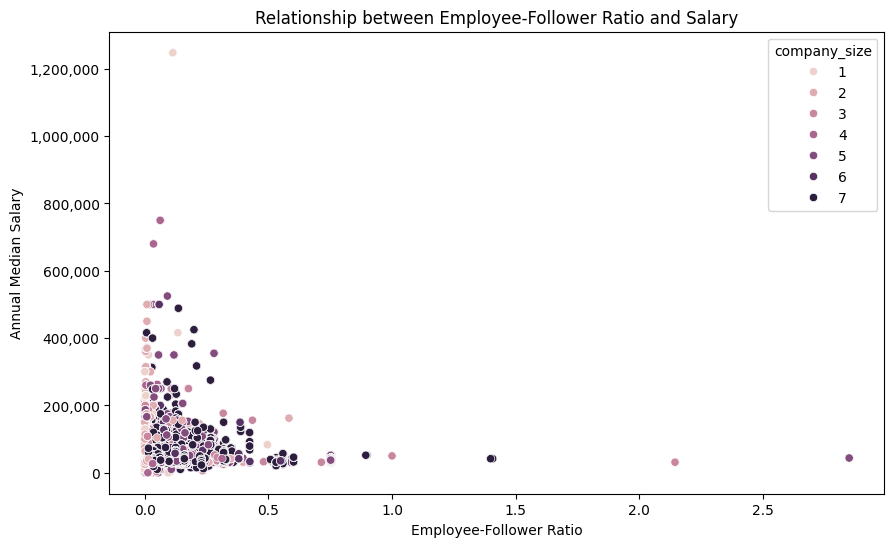

In [51]:
# 1. Relationship between follower_employee_ratio and salary
# Create a scatter plot to show the relationship between follower_employee_ratio and salary with different company sizes
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=df, x='employee_follower_ratio', y='annual_med_salary', hue='company_size')

# Set the title and labels to not showing scientific notation
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.set_title('Relationship between Employee-Follower Ratio and Salary')
ax.set_xlabel('Employee-Follower Ratio')
ax.set_ylabel('Annual Median Salary')
plt.show()

<Figure size 1000x600 with 0 Axes>

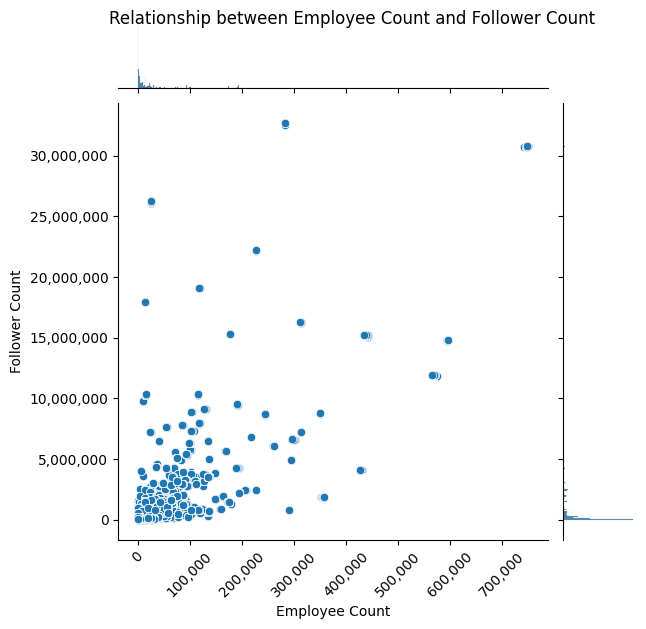

In [59]:
# 2. Check if there are some small companies with high attention: joint plot of employee count and follower count if both are not equal to 0
plt.figure(figsize=(10, 6))
g = sns.jointplot(data=df[(df['employee_count'] > 0) & (df['follower_count'] > 0)], x='employee_count', y='follower_count', kind='scatter')
g.ax_joint.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
g.ax_joint.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
g.ax_joint.set_xlabel('Employee Count')
g.ax_joint.set_ylabel('Follower Count')
g.fig.suptitle('Relationship between Employee Count and Follower Count')
# rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Frequency')

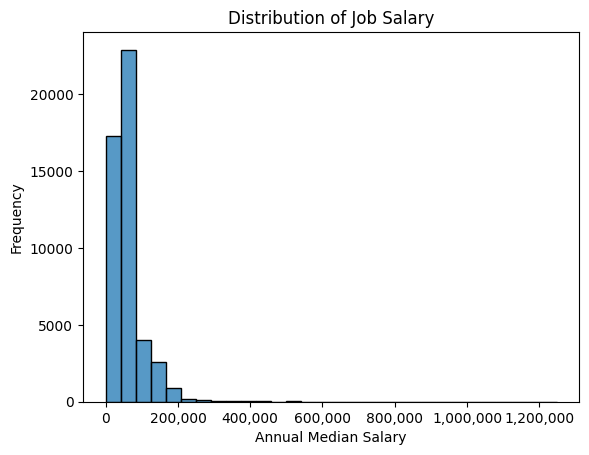

In [61]:
#3. Distribution of Job annual median，min and max Salary
s = sns.histplot(data=df, x='annual_med_salary', bins=30)
s.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Distribution of Job Salary')
plt.xlabel('Annual Median Salary')
plt.ylabel('Frequency')

<Axes: xlabel='skill_category', ylabel='annual_med_salary'>

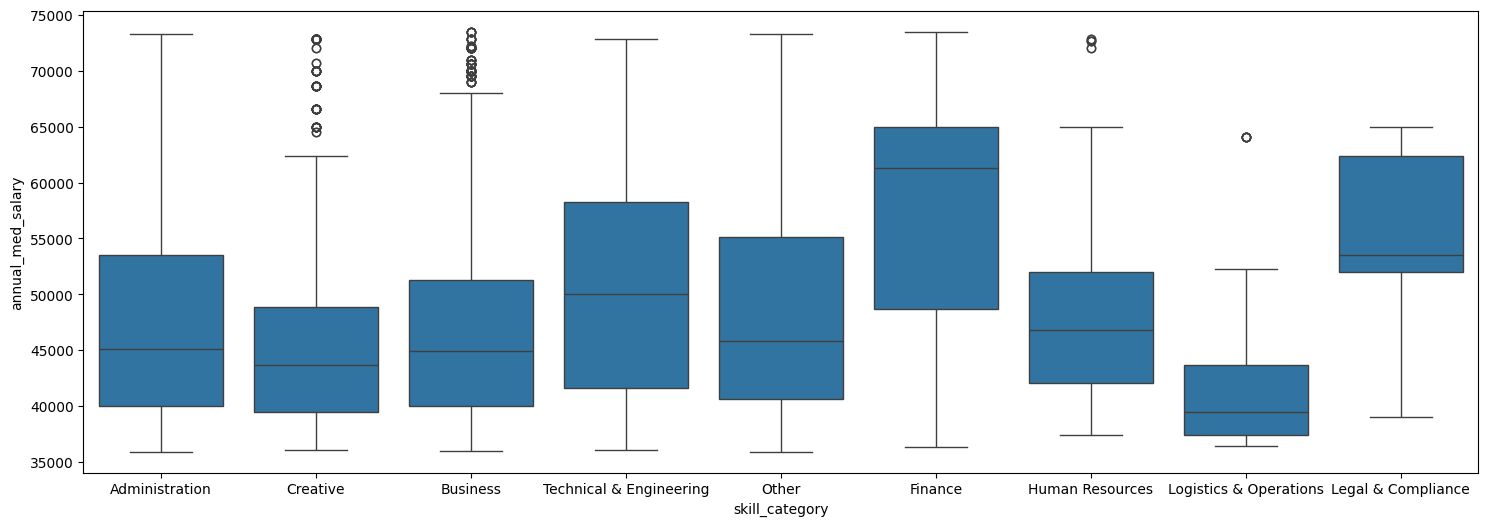

In [25]:
#4. plot the distribution of job salary by skills and industries
plt.figure(figsize=(18, 6))
# set thresholds for the number of rows to display
threshold_low = 0.2
threshold_high = 0.8
# get the top and bottom quantiles that stands for most jobs 
low_quantile = df['annual_med_salary'].quantile(threshold_low)
high_quantile = df['annual_med_salary'].quantile(threshold_high)
# filter the data
df_filtered = df[(df['annual_med_salary'] > low_quantile) & (df['annual_med_salary'] < high_quantile)]
# plot the data
sns.boxplot(data=df_filtered, x='skill_category', y='annual_med_salary')

# **Reference**

https://www.kaggle.com/code/muhammadrifqimaruf/top10-recommendation-linkedin-job-posting

https://www.dol.gov/general/topic/benefits-leave/fmla#:~:text=The%20Family%20and%20Medical%20Leave,job%2Dprotected%20leave%20per%20year.